import packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [ ]:
# Input data files are available in the "../data/" directory.
import os
print(os.listdir("./data"))

['.DS_Store', 'images', 'images 12', 'images 3', 'images 4', 'images_009.zip', 'images 5', 'Data_Entry_2017.csv', 'images 2', 'images_008.zip', 'BBox_List_2017.csv', 'images_003.zip', 'images_005.zip', 'images_011.zip', 'images_010.zip', 'images_004.zip', 'images_012.zip', 'images_006.zip', 'images_007.zip', 'images 9', 'images 7', 'images 11', 'images 6', 'images 8', 'images 10']


# EDA and Preprocessing

In [ ]:
# load csv dataset from data folder
df = pd.read_csv('./data/Data_Entry_2017.csv')
# check how many observation and features
print("There are {} observations and {} features in the dataset".format(df.shape[0], df.shape[1]))
# check the first 5 rows
df.head()

There are 112120 observations and 12 features in the dataset


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [ ]:
# check missing value
df.isnull().sum()

Image Index                         0
Finding Labels                      0
Follow-up #                         0
Patient ID                          0
Patient Age                         0
Patient Gender                      0
View Position                       0
OriginalImage[Width                 0
Height]                             0
OriginalImagePixelSpacing[x         0
y]                                  0
Unnamed: 11                    112120
dtype: int64

In [ ]:
# drop Unnamed: 11 column
df.drop('Unnamed: 11', axis=1, inplace=True)
# check all unique finding labels
df['Finding Labels'].unique()

array(['Cardiomegaly', 'Cardiomegaly|Emphysema', 'Cardiomegaly|Effusion',
       'No Finding', 'Hernia', 'Hernia|Infiltration', 'Mass|Nodule',
       'Infiltration', 'Effusion|Infiltration', 'Nodule', 'Emphysema',
       'Effusion', 'Atelectasis', 'Effusion|Mass',
       'Emphysema|Pneumothorax', 'Pleural_Thickening',
       'Effusion|Emphysema|Infiltration|Pneumothorax',
       'Emphysema|Infiltration|Pleural_Thickening|Pneumothorax',
       'Effusion|Pneumonia|Pneumothorax', 'Pneumothorax',
       'Effusion|Infiltration|Pneumothorax', 'Infiltration|Mass',
       'Infiltration|Mass|Pneumothorax', 'Mass',
       'Cardiomegaly|Infiltration|Mass|Nodule',
       'Cardiomegaly|Effusion|Emphysema|Mass',
       'Atelectasis|Cardiomegaly|Emphysema|Mass|Pneumothorax',
       'Emphysema|Mass', 'Emphysema|Mass|Pneumothorax',
       'Atelectasis|Pneumothorax', 'Cardiomegaly|Emphysema|Pneumothorax',
       'Mass|Pleural_Thickening', 'Cardiomegaly|Mass|Pleural_Thickening',
       'Effusion|Infiltra

There are many multifindings and no finidings images. There are two ways we want to deal with them:  
- We will exclude them from the dataset. Only keep single-finding data. The downside of these approaches are, after we exclude all these images, there would be only 30963 left.  Do we keep no findings?
- Keep those multilabel data. ....


In [ ]:
# See how many types of single findings we have
single_findings = []
for finding in df['Finding Labels'].unique():
    if "|" in finding or "No Finding" in finding:
        continue
    else:
        single_findings.append(finding)
print(set(single_findings))


{'Hernia', 'Pneumothorax', 'Edema', 'Nodule', 'Pneumonia', 'Mass', 'Cardiomegaly', 'Infiltration', 'Pleural_Thickening', 'Consolidation', 'Fibrosis', 'Effusion', 'Atelectasis', 'Emphysema'}


In [ ]:
# load image paths
from glob import glob
image_paths = glob('./data/images*/*.png')
print(f'Total image files found : {len(image_paths)}')

Total image files found : 112120


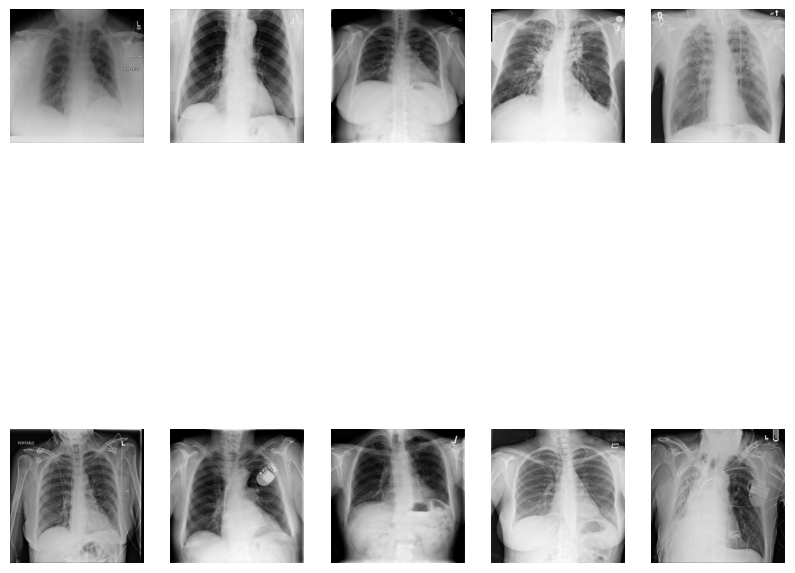

In [ ]:
# plot the first ten images as subplots
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(plt.imread(image_paths[i]), cmap='gray')
    plt.axis('off')

In [ ]:
# merge image path and the dataframe
Index =[]
for path in image_paths:
    Index.append(path.split('/')[3])
index_path_map = pd.DataFrame({'Index':Index, 'FilePath': image_paths})
index_path_map.head()

# rename "Image Index" column to "Index"
df.rename(columns={'Image Index':'Index'}, inplace=True)

# # Merge the absolute path of the images to the main dataframe
path_df = pd.merge(df, index_path_map, on='Index', how='inner')
path_df.head(3)

,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],FilePath
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,./data/images/00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,./data/images/00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,./data/images/00000001_002.png


**Finding realted to heart disease**
1. Cardiomegaly  
2. Effusion
3. Edema

Given that our main classification is heart-realted findings, we combine findings that might be realted to heart-disease. And we will exclude sample with other types of findings and only preserve no-finding data.

In [ ]:
path_df['heart_findings'] = 0
path_df.loc[path_df['Finding Labels'].str.contains(r'(Cardiomegaly|Effusion|Edema)'), 'heart_findings'] = 1
heart_df = path_df.copy()
mask = (heart_df['heart_findings'] != 0) | (heart_df['Finding Labels'] == 'No Finding')
heart_df = heart_df[mask]

/var/folders/_j/jlg7gh011jsfh6txv8lws4zw0000gn/T/ipykernel_80491/1586074886.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  path_df.loc[path_df['Finding Labels'].str.contains(r'(Cardiomegaly|Effusion|Edema)'), 'heart_findings'] = 1


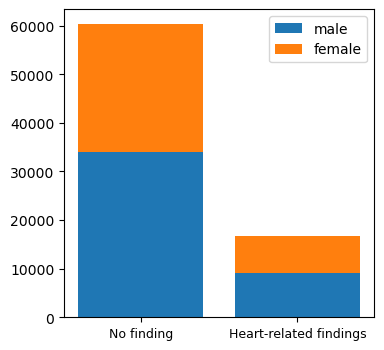

In [ ]:
# plot the distribution of hear disease related findings
plt.figure(figsize=(4,4))
male_findings = heart_df.loc[heart_df['Patient Gender'] == 'M', 'heart_findings'].value_counts().sort_index()
female_findings = heart_df.loc[heart_df['Patient Gender'] == 'F', 'heart_findings'].value_counts().sort_index()
plt.bar(male_findings.index, male_findings.values, label = 'male')
plt.bar(female_findings.index, female_findings.values, bottom=male_findings.values, label = 'female')
plt.legend()
plt.xticks([0,1], ['No finding', 'Heart-related findings'], size = 9);

# Create imbalanced training set
- create a balanced dataset with regard to class
- Train test split with 80-20% ratio
- Make train set imbalanced with regard to genders where male:female = 95:5
- Split the imbalanced train set to train and validation set.


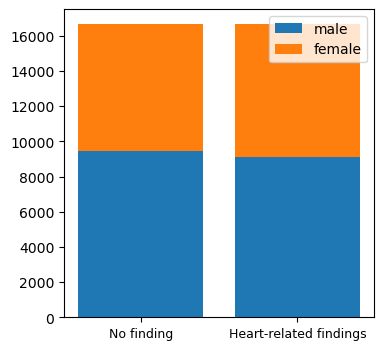

In [ ]:
# create a balanced dataset
non_heart = heart_df.loc[heart_df['heart_findings'] == 0].sample(heart_df['heart_findings'].sum())
balanced_df = pd.concat([heart_df.loc[heart_df['heart_findings'] == 1], non_heart])

plt.figure(figsize=(4,4))
male_findings = balanced_df.loc[balanced_df['Patient Gender'] == 'M', 'heart_findings'].value_counts().sort_index()
female_findings = balanced_df.loc[balanced_df['Patient Gender'] == 'F', 'heart_findings'].value_counts().sort_index()
plt.bar(male_findings.index, male_findings.values, label = 'male')
plt.bar(female_findings.index, female_findings.values, bottom=male_findings.values, label = 'female')
plt.legend()
plt.xticks([0,1], ['No finding', 'Heart-related findings'], size = 9);

In [ ]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(balanced_df, test_size=0.2, random_state=1)

# make an imbalanced dataset by undersampling female class
train_male = train_df[train_df['Patient Gender'] == 'M']
train_female = train_df[train_df['Patient Gender'] == 'F']


# sample male:femal ration equals 8:2 from each class:
# heart ==1
male_sample_num = train_male[train_male['heart_findings'] == 1].shape[0]
female_sample_num = np.round(male_sample_num*0.05).astype(int)
# sample from female set
female_df1 = train_female[train_female['heart_findings'] == 1].sample(female_sample_num)
# heart ==0 
male_sample_num = train_male[train_male['heart_findings'] == 0].shape[0]
female_sample_num = np.round(male_sample_num*0.05).astype(int)
# sample from female set
female_df0 = train_female[train_female['heart_findings'] == 0].sample(female_sample_num)

# concat to df_imbalanced
df_imbalanced = pd.concat([train_male, female_df1])
df_imbalanced = pd.concat([df_imbalanced, female_df0])


# check the distribution of each class is around 4:1 male:female
male_findings = df_imbalanced[df_imbalanced['Patient Gender'] == 'M']['heart_findings'].value_counts().sort_index()
female_findings = df_imbalanced[df_imbalanced['Patient Gender'] == 'F']['heart_findings'].value_counts().sort_index()
female_findings/male_findings *100

0    5.001313
1    4.997923
Name: heart_findings, dtype: float64

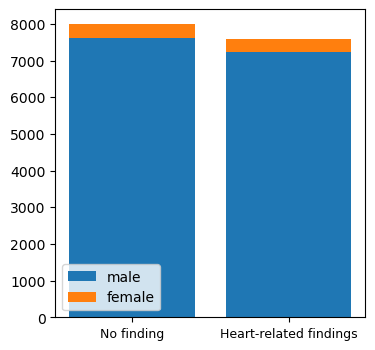

In [ ]:
# plot the distribution of hear disease related findings
plt.figure(figsize=(4,4))
male_findings = df_imbalanced.loc[df_imbalanced['Patient Gender'] == 'M', 'heart_findings'].value_counts().sort_index()
female_findings = df_imbalanced.loc[df_imbalanced['Patient Gender'] == 'F', 'heart_findings'].value_counts().sort_index()
plt.bar(male_findings.index, male_findings.values, label = 'male')
plt.bar(female_findings.index, female_findings.values, bottom=male_findings.values, label = 'female')
plt.legend()
plt.xticks([0,1], ['No finding', 'Heart-related findings'], size = 9);

# Image preprocessing
Image augmentation, rotate, zoom, flip...etc

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# create train and valid set with 80:20 split using df_imbalanced
train_df, valid_df = train_test_split(df_imbalanced, test_size=0.2, random_state=1)

In [ ]:
# create train and test data generator
IMAGE_SIZE=[256, 256]
EPOCHS = 20
# BATCH_SIZE = 8 * strategy.num_replicas_in_sync
BATCH_SIZE = 32

def get_generator(df, image_dir, x_col, y_cols, sample_size=100, batch_size=8, seed=1, target_w = 320, target_h = 320):
    
    print("getting image generators...")
    
    # use sample to fit mean and std for test set generator
    image_generator = ImageDataGenerator(
        samplewise_center=True,
        samplewise_std_normalization= True,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)
    
    test_generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))
    
    return test_generator

train_generator = get_generator(df = train_df,
                                      image_dir = None, 
                                      x_col = 'FilePath',
                                      y_cols = 'heart_findings', 
                                      batch_size=BATCH_SIZE,
                                      target_w = IMAGE_SIZE[0], 
                                      target_h = IMAGE_SIZE[1]
                                      )


valid_generator = get_generator(df = valid_df,
                                      image_dir = None, 
                                      x_col = 'FilePath',
                                      y_cols = 'heart_findings', 
                                      batch_size=128,
                                      target_w = IMAGE_SIZE[0], 
                                      target_h = IMAGE_SIZE[1] 
                                      )
# # define valid x and y
# valid_x, valid_y = next(get_generator(df = valid_df,
#                                       image_dir = None, 
#                                       x_col = 'FilePath',
#                                       y_cols = 'target_vector', 
#                                       batch_size=valid_df.shape[0],
#                                       target_w = IMAGE_SIZE[0], 
#                                       target_h = IMAGE_SIZE[1] 
                                    #   ))


getting image generators...
Found 12466 validated image filenames.
getting image generators...
Found 3117 validated image filenames.


# Train DenseNet121 model on the imbalanced training set

In [ ]:
model = keras.models.Sequential()
# input of the model 
img_in = keras.layers.Input(shape=(256, 256, 3), name='img_in')
model.add(DenseNet121(weights='imagenet', include_top=False, input_shape=(256, 256, 3), input_tensor= img_in ))
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='sigmoid'))
# compile model, run summary
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 8, 8, 1024)        7037504   
                                                                 
 global_average_pooling2d_25  (None, 1024)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_25 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 7,038,529
Trainable params: 6,954,881
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
model.fit(train_generator, epochs = 3, validation_data= valid_generator)


Epoch 1/3
390/390 [==============================] - 6164s 16s/step - loss: 0.5488 - accuracy: 0.7342 - val_loss: 0.5370 - val_accuracy: 0.7780
Epoch 2/3
390/390 [==============================] - 1951s 5s/step - loss: 0.5146 - accuracy: 0.7587 - val_loss: 0.7370 - val_accuracy: 0.5897
Epoch 3/3
390/390 [==============================] - 1753s 4s/step - loss: 0.4971 - accuracy: 0.7733 - val_loss: 0.5219 - val_accuracy: 0.7501


Create a balanced test set



In [ ]:
# create a balanced test set 
test_male = test_df[test_df['Patient Gender'] == 'M']
test_female = test_df[test_df['Patient Gender'] == 'F']

df_balanced_test = pd.DataFrame(columns = test_df.columns)

# sample male:femal ration equals 1:1 from each class:
for finding in [0, 1]:
    male_sample = test_male[test_male['heart_findings'] == finding].shape[0]
    female_sample = test_female[test_female['heart_findings'] == finding].shape[0]
    if male_sample <= female_sample:
        sample_num = male_sample
    else:
        sample_num = female_sample
    
    # sample from male and female set
    male_df = test_male[test_male['heart_findings'] == finding].sample(sample_num)
    female_df = test_female[test_female['heart_findings'] == finding].sample(sample_num)    
    # concat to df_imbalanced
    df_balanced_test = pd.concat([df_balanced_test, male_df])
    df_balanced_test = pd.concat([df_balanced_test, female_df])

# check the distribution of each class is around 1:1 male:female
male_findings = df_balanced_test[df_balanced_test['Patient Gender'] == 'M']['heart_findings'].value_counts().sort_index()
female_findings = df_balanced_test[df_balanced_test['Patient Gender'] == 'F']['heart_findings'].value_counts().sort_index()
female_findings/male_findings *100


0    100.0
1    100.0
Name: heart_findings, dtype: float64

# Predict on the balanced test set to evalaute the fairness of the model

In [ ]:
test_generator = get_generator(df = df_balanced_test,
                                      image_dir = None, 
                                      x_col = 'FilePath',
                                      y_cols = 'heart_findings',
                                      batch_size= df_balanced_test.shape[0], target_w = IMAGE_SIZE[0], 
                                      target_h = IMAGE_SIZE[1]
                                      )  
x_test, y_test = next(test_generator)


getting image generators...
Found 5914 validated image filenames.


In [ ]:
predict_prob = model.predict(x_test)
predict_classes = np.round(predict_prob)



 15/185 [=>............................] - ETA: 3:01

In [ ]:
from sklearn.metrics import precision_score, accuracy_score
precision_ = precision_score(np.array(df_balanced_test['heart_findings'], dtype='int64').reshape(-1,), predict_classes)


In [ ]:
# evaluate precision for male and female
df_balanced_test['predict_classes'] = predict_classes
male_test = df_balanced_test[df_balanced_test['Patient Gender'] == 'M']
female_test = df_balanced_test[df_balanced_test['Patient Gender'] == 'F']

# get precision for male and female
male_precision = precision_score(np.array(male_test['heart_findings'], dtype='int64').reshape(-1,), male_test['predict_classes'])
female_precision = precision_score(np.array(female_test['heart_findings'], dtype='int64').reshape(-1,), female_test['predict_classes'])

In [ ]:
print('Precision on all balanced test data: %f' % precision_)
print("Male precision: ", male_precision)
print("Female precision: ", female_precision)

Precision on all balanced test data: 0.772563
Male precision:  0.800749063670412
Female precision:  0.7463414634146341
